<a href="https://colab.research.google.com/github/jahn5244/amazon-data-analysis/blob/main/dataanalyticsamazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction



1.  What is this dataset about?

The dataset consists of information about Amazon Prime users, including demographic details such as gender, location, and date of birth, as well as membership information like subscription plan and payment details. Additionally, it contains data on user behavior, such as favorite genres, engagement metrics, purchase history, and feedback/ratings.


2. What is exactly your research question? What do you want to learn from data? What is your learning model, e.g., a Classification, Clustering, etc?

My research question is to predict the gender of users based on their favorite genres and engagement metrics. We want to understand if there are any patterns or relationships between user behavior/preferences and gender. This is a classification problem, where I aim to classify users into two categories: Male (1) and Female (0). We do this by implementing two classification models, the Random Forest Classifier, and a Logistic Regression Model.

3. What is your current expectation about the results? Why?

I expect that the model will achieve moderate accuracy in predicting gender based on favorite genres and engagement metrics. I anticipate that certain genres and engagement patterns may be more prevalent among one gender compared to the other, allowing the model to learn discriminatory features.

4. Describe how you evaluate your project. How to access the correctness of your model? How well would you expect that the model will work?

I evaluate the project by assessing the performance of our gender prediction model using metrics such as accuracy, precision, recall, and F1-score. These metrics provide insights into the model's ability to correctly classify users into their respective genders. I expect the model to perform reasonably well, considering that user behavior and preferences may exhibit gender-related patterns. However, I acknowledge that the model's performance may be influenced by various factors such as data quality, feature representation, and inherent biases in the dataset.


Side Note: This project is still being worked on during the time this code is placed in the repository. There are still some models that have not been completely assessed and there are some improvements in the classification models that I wanted to implement in the code.










 The dataset that I will be utilizing will be the Amazon Prime user information, with a total of 2500 observations with 19 different columns. The initial packages initialized are the numpy, matplotlib, and pandas packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Data Cleaning and Classification Model Implementations

For the beginning of the code, I will be loading in the amazon prime csv file which has 2500 different observations. In order to clean up the variable, I will be initially using Stratified KFold to take approximately only 2000 observations without skewing the variables. The target variable in this case is the gender of the Amazon Prime user.


Stratified K-Fold Cross-Validation is a method of K-Fold Cross-Validation that preserves the original class distribution in each fold. This technique is essential for datasets with imbalanced classes, as it guarantees that each fold reflects the same proportion of each class as found in the complete dataset, ensuring a balanced representation throughout the validation process. This is to prevent any relevant skewing of the data in favor of an individual variable and to ensure that the models that are being tested are reliable in representing relevant patterns between the data points.


In [2]:
# This is the link for the dataset from Kaggle: https://www.kaggle.com/datasets/arnavsmayan/amazon-prime-userbase-dataset?resource=download
# The csv file will also be included in the Github repository

amz = pd.read_csv("amazon_prime_users.csv")

from sklearn.model_selection import StratifiedKFold

# 'amz' is the original DataFrame with 2500 samples
# 'Gender' is the name of the target variable column

# Initialize StratifiedKFold with approximately 25 folds
skf = StratifiedKFold(n_splits=25, shuffle=True, random_state=42)

# Initialize variables to store the sampled dataset
reduced_dataset = pd.DataFrame()

total_samples = 0

# Iterate over the folds
for _, fold_index in skf.split(amz, amz['Gender']):
    # Select samples from the fold index
    fold_samples = amz.iloc[fold_index]

    # Calculate the remaining samples needed to reach approximately 2000
    remaining_samples_needed = 2000 - total_samples

    # Take samples from the fold to fulfill the remaining needed
    samples_to_take = min(remaining_samples_needed, len(fold_samples))

    # Append the selected samples to the reduced dataset
    reduced_dataset = pd.concat([reduced_dataset, fold_samples.head(samples_to_take)], axis=0)

    # Update the total samples count
    total_samples += samples_to_take

    # Check if the desired size is reached
    if total_samples >= 2000:
        break

# Now 'reduced_dataset' contains approximately 2000 samples with preserved class balance
reduced_dataset


,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1
12,13,Kevin Mayo,hochoa@example.net,hochoa,1981-11-18,Female,Michaeltown,2024-01-10,2025-01-09,Monthly,Amex,Auto-renew,Regular,Clothing,Action,Tablet,Medium,4.7,0
48,49,Melissa Wells,luis09@example.net,luis09,1950-07-27,Female,South Kylestad,2024-03-09,2025-03-09,Monthly,Mastercard,Auto-renew,Occasional,Electronics,Horror,Smart TV,Low,3.1,8
54,55,Margaret Cooper,fbradley@example.org,fbradley,1964-02-19,Female,Lake Samantha,2024-03-13,2025-03-13,Annual,Visa,Auto-renew,Frequent,Clothing,Action,Tablet,Low,4.9,3
101,102,Paula Perez,trevorwelch@example.net,trevorwelch,2003-03-12,Female,Dicksonmouth,2024-04-12,2025-04-12,Annual,Amex,Manual,Regular,Books,Sci-Fi,Tablet,Low,3.5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,2341,Scott Hill,rpeters@example.org,rpeters,1996-05-18,Female,Nicoleton,2024-01-22,2025-01-21,Monthly,Mastercard,Manual,Frequent,Books,Drama,Smart TV,Low,3.1,7
2358,2359,Christopher Perez,darrellbarrett@example.net,darrellbarrett,2004-03-11,Male,Lake Emilyport,2024-01-30,2025-01-29,Annual,Amex,Auto-renew,Occasional,Books,Romance,Smart TV,Low,4.0,1
2392,2393,Trevor Diaz,sdavidson@example.com,sdavidson,1976-04-04,Female,Lancefort,2024-03-21,2025-03-21,Annual,Amex,Manual,Occasional,Books,Sci-Fi,Smartphone,Low,4.5,3
2427,2428,Joseph Marquez,aaron39@example.com,aaron39,1973-04-14,Male,Jacobton,2024-04-04,2025-04-04,Monthly,Visa,Manual,Occasional,Books,Drama,Smart TV,Low,3.1,7


This part was used to check to make sure that the sample size of the reduced dataset was 2000 variables. Now the dataset must be cleaned more so the logistic regression model can be applied to the dataset.

In [3]:
total_rows = reduced_dataset.shape[0]
print("Total rows in reduced_dataset:", total_rows)

Total rows in reduced_dataset: 2000


Now, the 'Gender' variable was changed to numerical values so that logistic regression can be applied to the dataset where the 'Male' variables is 1 and 'Female' variable is 0

In [4]:
reduced_dataset['Gender'] = reduced_dataset['Gender'].replace({'Male': 1, 'Female': 0})
reduced_dataset

,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,1,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1
12,13,Kevin Mayo,hochoa@example.net,hochoa,1981-11-18,0,Michaeltown,2024-01-10,2025-01-09,Monthly,Amex,Auto-renew,Regular,Clothing,Action,Tablet,Medium,4.7,0
48,49,Melissa Wells,luis09@example.net,luis09,1950-07-27,0,South Kylestad,2024-03-09,2025-03-09,Monthly,Mastercard,Auto-renew,Occasional,Electronics,Horror,Smart TV,Low,3.1,8
54,55,Margaret Cooper,fbradley@example.org,fbradley,1964-02-19,0,Lake Samantha,2024-03-13,2025-03-13,Annual,Visa,Auto-renew,Frequent,Clothing,Action,Tablet,Low,4.9,3
101,102,Paula Perez,trevorwelch@example.net,trevorwelch,2003-03-12,0,Dicksonmouth,2024-04-12,2025-04-12,Annual,Amex,Manual,Regular,Books,Sci-Fi,Tablet,Low,3.5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2340,2341,Scott Hill,rpeters@example.org,rpeters,1996-05-18,0,Nicoleton,2024-01-22,2025-01-21,Monthly,Mastercard,Manual,Frequent,Books,Drama,Smart TV,Low,3.1,7
2358,2359,Christopher Perez,darrellbarrett@example.net,darrellbarrett,2004-03-11,1,Lake Emilyport,2024-01-30,2025-01-29,Annual,Amex,Auto-renew,Occasional,Books,Romance,Smart TV,Low,4.0,1
2392,2393,Trevor Diaz,sdavidson@example.com,sdavidson,1976-04-04,0,Lancefort,2024-03-21,2025-03-21,Annual,Amex,Manual,Occasional,Books,Sci-Fi,Smartphone,Low,4.5,3
2427,2428,Joseph Marquez,aaron39@example.com,aaron39,1973-04-14,1,Jacobton,2024-04-04,2025-04-04,Monthly,Visa,Manual,Occasional,Books,Drama,Smart TV,Low,3.1,7


Next, the 'Favorite Genres' and 'Engagement Metrics' variables were replaced with variable names that are more accessible with the classification models.

In [ ]:
reduced_dataset.rename(columns={'Favorite Genres': 'favorite_genres'}, inplace=True)
reduced_dataset.rename(columns={'Engagement Metrics': 'engagement_metrics'}, inplace=True)


With the variables more accessible and the dataset cleaned, I will proceed with Logistic Regression model to evaluate the effectiveness of the predictors to the 'Gender' variable.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns


# 'reduced_dataset' is the DataFrame with the reduced dataset
# 'favorite_genres' and 'engagement_metrics' are the categorical predictor variables
# 'Gender' is the target variable

# Extract predictor and target variables
X = reduced_dataset[['favorite_genres', 'engagement_metrics']]
y = reduced_dataset['Gender']

# Encode categorical variables into numerical format using pandas get_dummies()
X_encoded = pd.get_dummies(X, drop_first=True)  # Drop first column to avoid multicollinearity

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.43      0.42       187
           1       0.49      0.48      0.49       213

    accuracy                           0.46       400
   macro avg       0.46      0.46      0.46       400
weighted avg       0.46      0.46      0.46       400



Based on the classification report,the model indicates that the logistic regression model performs moderately well in predicting gender based on the provided variables 'favorite_genres' and 'engagement_metrics', with an overall accuracy of 46%. When considering the prediction of males (class 1), the model achieves a precision of 49%, indicating that around half of the instances classified as male were indeed male. The recall for males is 48%, indicating that the model identified around 48% of the actual male instances. The F1-score, which balances precision and recall, for males is 49%. For females (class 0), the model achieves a precision of 42%, indicating that around 42% of the instances classified as female were indeed female. The recall for females is 43%, indicating that the model identified around 43% of the actual female instances. The F1-score for females is 42%. These metrics suggest that while the model's performance is slightly better for predicting males than females, there is still room for improvement, particularly in terms of increasing recall for both genders. Further analysis and feature engineering may be necessary to enhance the model's predictive capabilities.

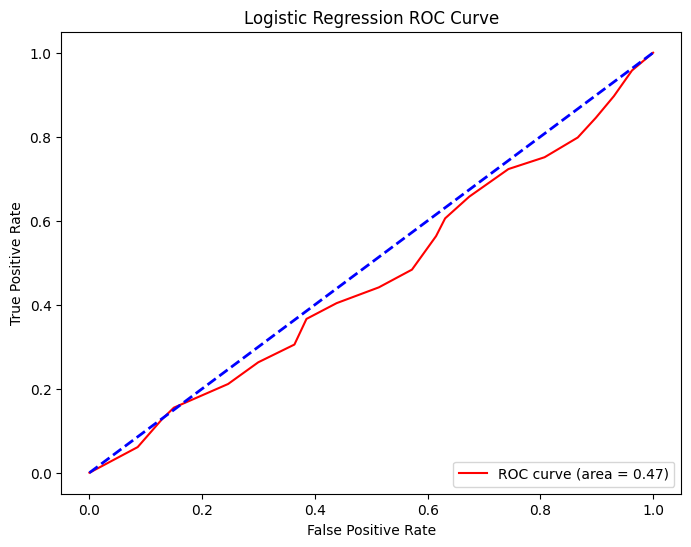

In [ ]:
#VISUALIZATIONNNN for LOG
from sklearn.metrics import roc_curve, auc


#probabilities for male
y_pred_probability = log_reg_model.predict_proba(X_test)
y_pred_probability_male = y_pred_probability[:, 1] #1 for male

false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, y_pred_probability_male)
roc_auc = auc(false_pos_rate, true_pos_rate)

#plot ROC
plt.figure(figsize=(8, 6))
plt.plot(false_pos_rate, true_pos_rate, color='red', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

Looking at the ROC curve (in red), it can be said that the model does not have very good performance. In a good model, the true positive rate should be high near 1 and the false positive rate low near 0. This means that a model with high performance would have an ROC curve that hugs the y axis and proceeds horizontally making an inverse L shape. The dotted blue line represents what the model would plot as under the assumption that it just randomly guesses. Any ROC curve that plots below the random classifier suggests that the model performes worse than even random guessing. With that, an area under curve closer to 1 is best as the ROC curve essentially bounds the axis to make a 1 by 1 square. The random classifier splits the graph in half for an area of 0.5. Since this area under the curve for the logistic regression is 0.47 which is less than 0.5, the logistic regression model has a worse performance than the random guessing classifier.

I will be applying the same approach, but with the Random Forest Classifier model. Here, I'll utilize OneHotEncoder and ColumnTransformer to convert the categorical variables 'favorite_genres' and 'engagement_metrics' into numeric values suitable for the model.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 'reduced_dataset' is the DataFrame with the reduced dataset
# 'favorite_genres' and 'engagement_metrics' are tje categorical predictor variables
# 'Gender' is the target variable

# Extract predictor and target variables
X = reduced_dataset[['favorite_genres', 'engagement_metrics']]
y = reduced_dataset['Gender']

# Apply one-hot encoding to categorical variables
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['favorite_genres', 'engagement_metrics'])
    ], remainder='passthrough')

X_encoded = column_transformer.fit_transform(X)

onehot_feature_names = column_transformer.named_transformers_['onehot'].get_feature_names_out(
    ['favorite_genres', 'engagement_metrics'])
feature_names = onehot_feature_names.tolist()

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, y_pred))




Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.44      0.47       187
           1       0.55      0.60      0.58       213

    accuracy                           0.53       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.52      0.53      0.52       400



The classification report provides a detailed analysis of the performance of a machine learning model in predicting gender based on the provided variables, where the label 1 represents Male and 0 represents Female.

The precision scores indicate the proportion of correctly predicted instances within each gender category. For males (class 1), the model achieved a precision of 0.55, suggesting that approximately 55% of the instances classified as male were indeed male. On the other hand, for females (class 0), the precision was slightly lower at 0.49, indicating that around 49% of the instances classified as female were actually female.

The recall scores shed light on the model's ability to identify instances of each gender class from the dataset. The recall for males was 0.60, implying that the model successfully identified approximately 60% of the actual male instances. For females, the recall was slightly lower at 0.44, suggesting that the model captured around 44% of the true female instances.

The F1-scores, which consider both precision and recall, provide a balanced measure of the model's performance for each gender category. The F1-score for males was 0.58, reflecting a reasonably balanced performance in predicting male instances. For females, the F1-score was 0.47, indicating a somewhat lower but still acceptable level of performance in classifying female instances.

Overall, the model achieved an accuracy of 0.53, implying that approximately 53% of the predictions made by the model were correct across both genders. While the model demonstrated a slightly better performance in predicting males compared to females, there is room for improvement, particularly in terms of increasing recall for females to better capture instances of this gender category. Further analysis and refinement of the model may be necessary to enhance its predictive capabilities and address any biases or limitations present in the dataset.

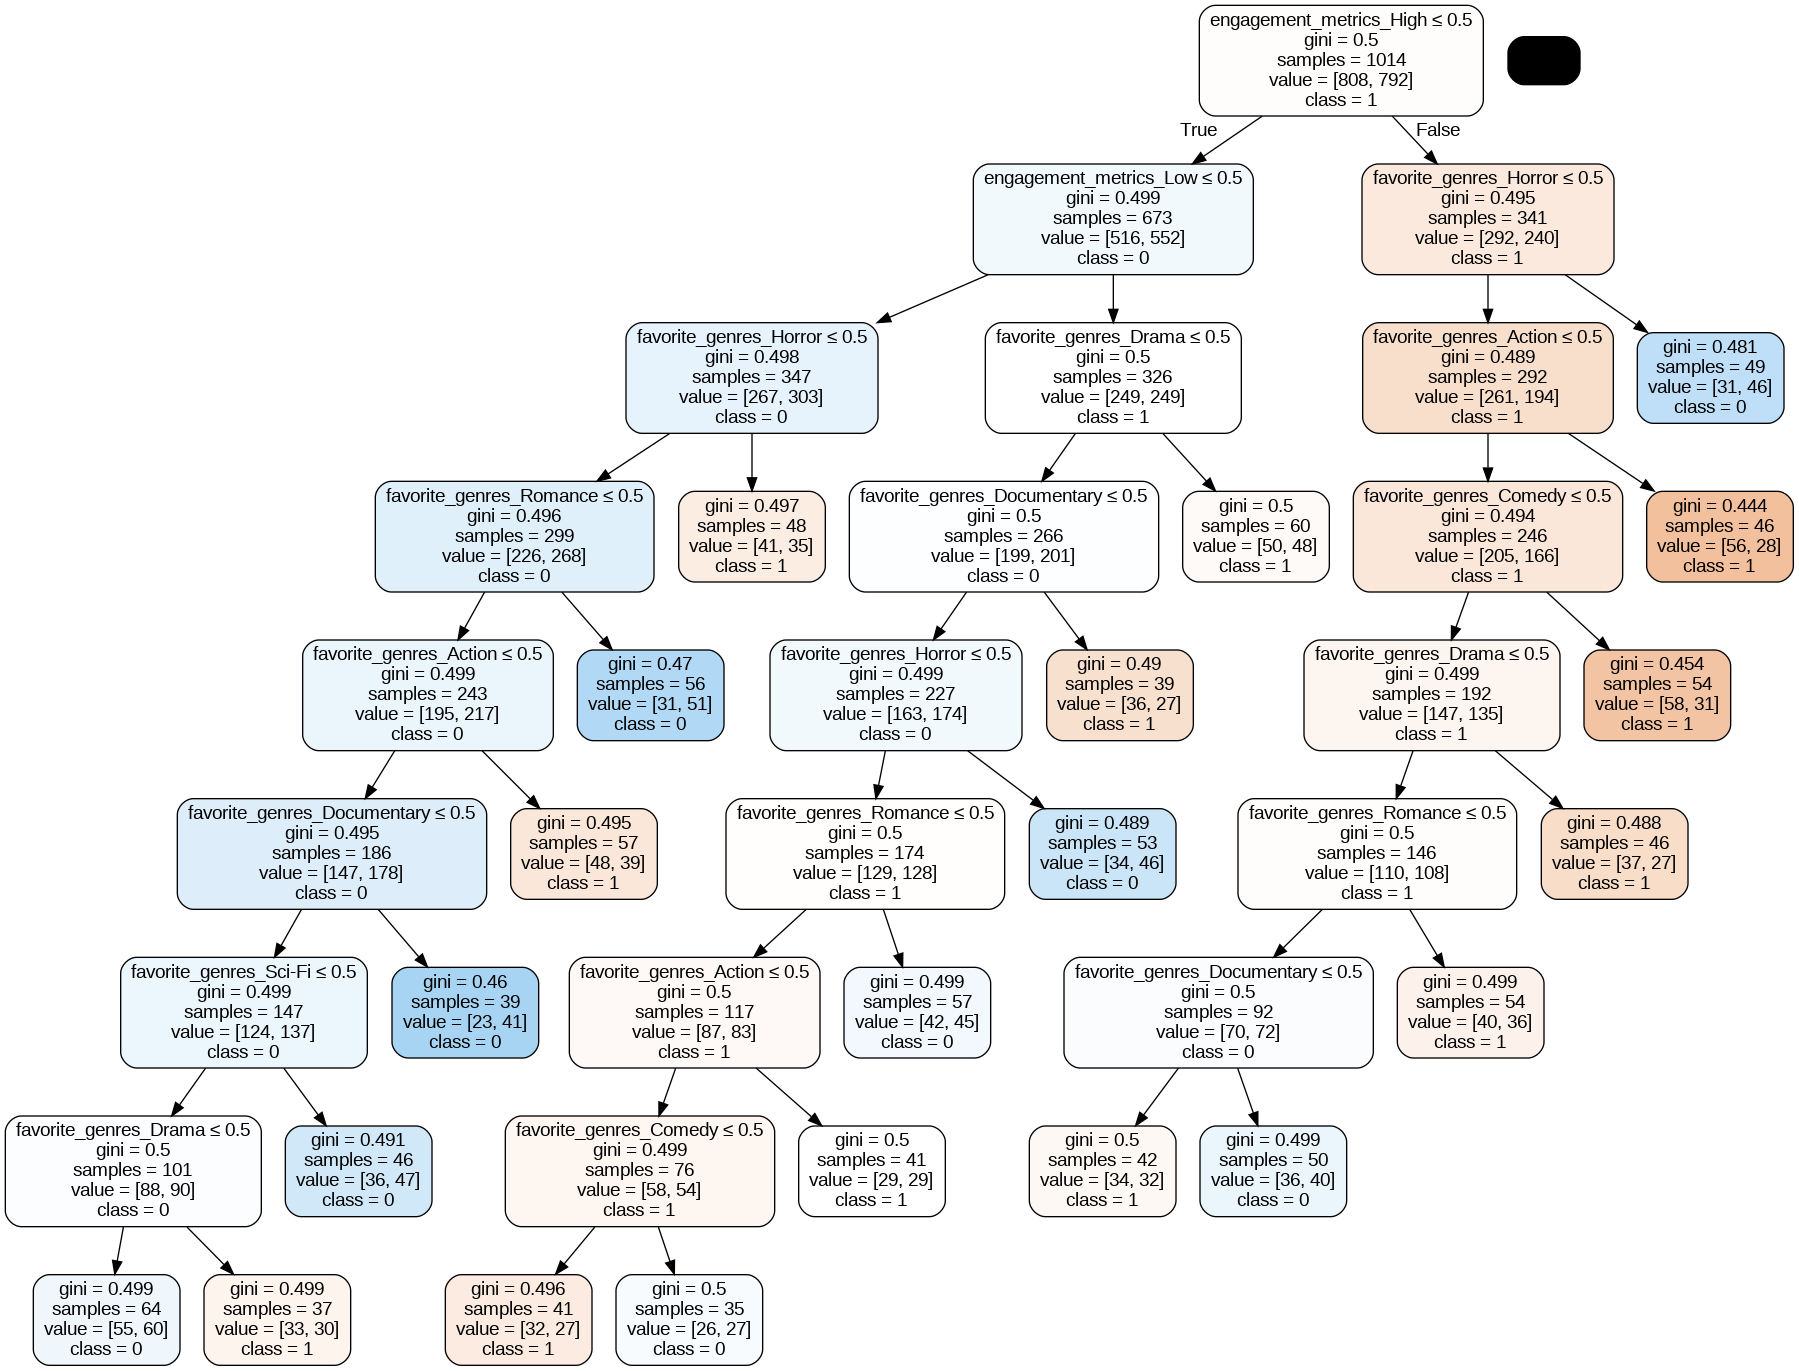

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

# Visualize the first tree in the random forest
tree = rf_classifier.estimators_[0]

# Extract class names
target_names = y.unique().astype(str).tolist()

dot_data = export_graphviz(tree, out_file=None,
                           feature_names=feature_names,
                           class_names=target_names,
                           filled=True, rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


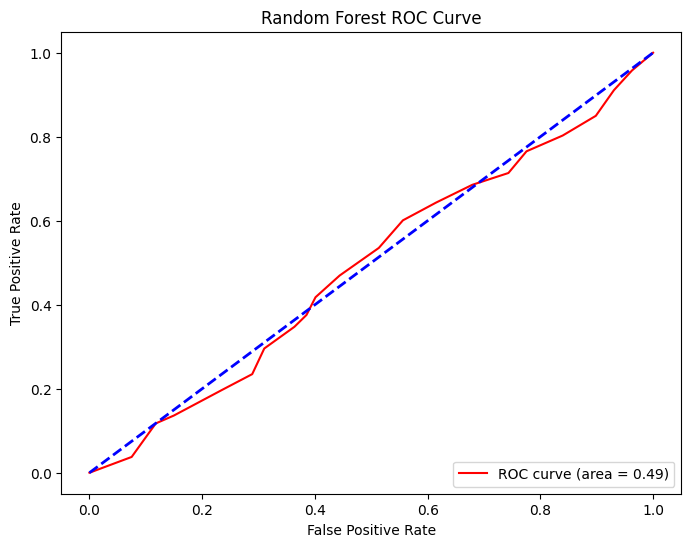

In [ ]:
#VISUALIZATIONNNN for Random Forest Classifier and AUC Curve
from sklearn.metrics import roc_curve, auc


#probabilities for male
y_pred_probability = rf_classifier.predict_proba(X_test)
y_pred_probability_male = y_pred_probability[:, 1] #1 for male

false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, y_pred_probability_male)
roc_auc = auc(false_pos_rate, true_pos_rate)

#plot ROC
plt.figure(figsize=(8, 6))
plt.plot(false_pos_rate, true_pos_rate, color='red', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

Simlar to what was said above for the logistic regression model, a ROC curve above the random classifier and an area closer to 1 is the most ideal. This random forest model has similarly poor performance to the linear regression model but seems to be slightly better than the linear regression as the area under the curve is slightly greater.

##  Result Improvements


To further enhance the performance of our models in predicting gender based on 'favorite_genres' and 'engagement_metrics', we will utilize hyperparameter tuning. By systematically exploring different combinations of hyperparameters through techniques like grid search, we aim to identify the optimal settings that maximize the models' predictive accuracy. This approach allows us to fine-tune the algorithms, such as logistic regression and random forest classifier, by adjusting parameters like regularization strength, number of estimators, and maximum depth of trees. Through hyperparameter tuning, we expect to refine our models and achieve improved predictive performance, ultimately enhancing the accuracy and robustness of our gender prediction task.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for logistic regression
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize logistic regression model
log_reg_model = LogisticRegression()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(log_reg_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params)

# Get the best model
best_log_reg_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_log_reg_model.predict(X_test)
print("Classification Report for Best Logistic Regression Model:")
print(classification_report(y_test, y_pred))


Best Hyperparameters for Logistic Regression: {'C': 1}
Classification Report for Best Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.42      0.43      0.42       187
           1       0.49      0.48      0.49       213

    accuracy                           0.46       400
   macro avg       0.46      0.46      0.46       400
weighted avg       0.46      0.46      0.46       400



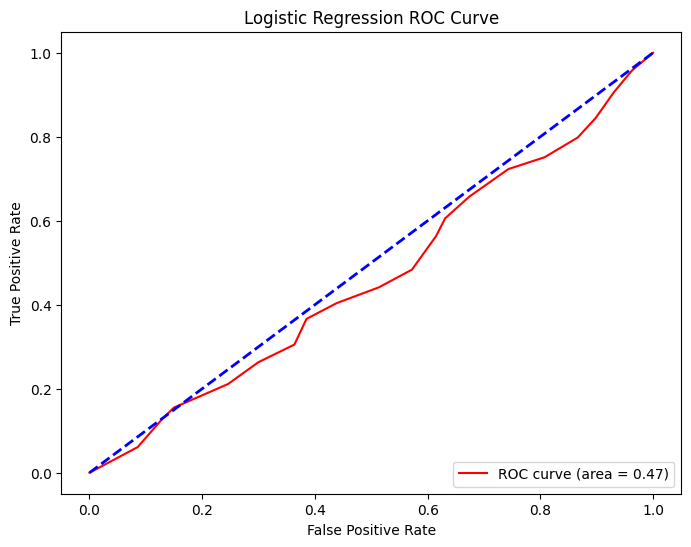

In [ ]:
#VISUALIZATIONNNN for better log
from sklearn.metrics import roc_curve, auc


#probabilities for male
y_pred_probability = best_log_reg_model.predict_proba(X_test)
y_pred_probability_male = y_pred_probability[:, 1] #1 for male

false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, y_pred_probability_male)
roc_auc = auc(false_pos_rate, true_pos_rate)

#plot ROC
plt.figure(figsize=(8, 6))
plt.plot(false_pos_rate, true_pos_rate, color='red', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Define the parameter grid for random forest classifier
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 10, 20, 30]}

# Initialize random forest classifier
rf_classifier = RandomForestClassifier()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters for Random Forest Classifier:", best_params)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_rf_model.predict(X_test)
print("Classification Report for Best Random Forest Classifier:")
print(classification_report(y_test, y_pred))


Best Hyperparameters for Random Forest Classifier: {'max_depth': None, 'n_estimators': 200}
Classification Report for Best Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.49      0.39      0.43       187
           1       0.54      0.64      0.59       213

    accuracy                           0.52       400
   macro avg       0.52      0.51      0.51       400
weighted avg       0.52      0.52      0.51       400



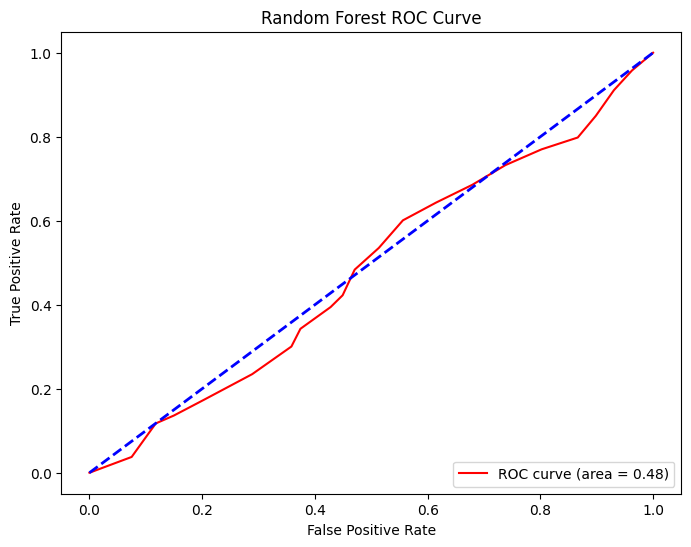

In [ ]:
#VISUALIZATIONNNN for better forest
from sklearn.metrics import roc_curve, auc


#probabilities for male
y_pred_probability = best_rf_model.predict_proba(X_test)
y_pred_probability_male = y_pred_probability[:, 1] #1 for male

false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test, y_pred_probability_male)
roc_auc = auc(false_pos_rate, true_pos_rate)

#plot ROC
plt.figure(figsize=(8, 6))
plt.plot(false_pos_rate, true_pos_rate, color='red', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()

## References

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

https://www.geeksforgeeks.org/hyperparameter-tuning/

https://www.kaggle.com/datasets/arnavsmayan/amazon-prime-userbase-dataset?resource=download